In [51]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn import  metrics
from math import sqrt


In [52]:
df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
695946,36,PAYMENT,37503.58,C1599905877,121.0,0.00,M1959719075,0.0,0.0,0.0,0.0
695947,36,PAYMENT,3913.54,C2040964445,31515.0,27601.46,M1343382567,0.0,0.0,0.0,0.0
695948,36,PAYMENT,29752.87,C1786128504,20006.0,0.00,M1774098045,0.0,0.0,0.0,0.0
695949,36,PAYMENT,11760.34,C637426266,10750.0,0.00,M1720590750,0.0,0.0,0.0,0.0


In [53]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695951 entries, 0 to 695950
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            695951 non-null  int64  
 1   type            695951 non-null  object 
 2   amount          695951 non-null  float64
 3   nameOrig        695951 non-null  object 
 4   oldbalanceOrg   695951 non-null  float64
 5   newbalanceOrig  695951 non-null  float64
 6   nameDest        695951 non-null  object 
 7   oldbalanceDest  695950 non-null  float64
 8   newbalanceDest  695950 non-null  float64
 9   isFraud         695950 non-null  float64
 10  isFlaggedFraud  695950 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 58.4+ MB


# Data Cleaning
Question 1)
Data cleaning is an essential step in any fraud detection process. By identifying and correcting inaccuracies in your data, you can improve the performance of your fraud detection models and reduce the risk of false positives and negatives.


->Identify and remove duplicate records

In [55]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [56]:
df=df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
695945,36,CASH_OUT,295898.98,C12921613,301513.0,5614.02,C276629076,0.0,295898.98,0.0,0.0
695946,36,PAYMENT,37503.58,C1599905877,121.0,0.00,M1959719075,0.0,0.00,0.0,0.0
695947,36,PAYMENT,3913.54,C2040964445,31515.0,27601.46,M1343382567,0.0,0.00,0.0,0.0
695948,36,PAYMENT,29752.87,C1786128504,20006.0,0.00,M1774098045,0.0,0.00,0.0,0.0


->Fill in missing values

In [58]:
df.duplicated().sum()

0

In [59]:
df.nunique()

step                  36
type                   5
amount            679098
nameOrig          695843
oldbalanceOrg     299520
newbalanceOrig    312185
nameDest          299755
oldbalanceDest    402488
newbalanceDest    259640
isFraud                2
isFlaggedFraud         1
dtype: int64

In [60]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,695951.000000,6.959510e+05,6.959510e+05,6.959510e+05,6.959500e+05,6.959500e+05,695950.000000,695950.0
mean,18.264019,1.632041e+05,8.818321e+05,9.020225e+05,9.798191e+05,1.138331e+06,0.000599,0.0
std,8.430880,2.699389e+05,2.950951e+06,2.987954e+06,2.320656e+06,2.467808e+06,0.024471,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,12.000000,1.278223e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,16.000000,7.779747e+04,1.693200e+04,0.000000e+00,1.182864e+05,2.144039e+05,0.000000,0.0
75%,20.000000,2.180228e+05,1.514638e+05,1.918100e+05,9.024043e+05,1.175632e+06,0.000000,0.0
max,36.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [63]:
df[df['isFraud']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
695945,36,CASH_OUT,295898.98,C12921613,301513.0,5614.02,C276629076,0.0,295898.98,0.0,0.0
695946,36,PAYMENT,37503.58,C1599905877,121.0,0.00,M1959719075,0.0,0.00,0.0,0.0
695947,36,PAYMENT,3913.54,C2040964445,31515.0,27601.46,M1343382567,0.0,0.00,0.0,0.0
695948,36,PAYMENT,29752.87,C1786128504,20006.0,0.00,M1774098045,0.0,0.00,0.0,0.0


In [64]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1.0,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1.0,0.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1.0,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
687726,36,TRANSFER,103056.00,C383698470,103056.00,0.0,C761769299,0.00,0.00,1.0,0.0
687727,36,CASH_OUT,103056.00,C1859440956,103056.00,0.0,C1389963224,444182.13,547238.13,1.0,0.0
694551,36,CASH_OUT,234377.29,C1737133410,0.00,0.0,C877378703,34937.86,269315.15,1.0,0.0
695414,36,TRANSFER,1684039.12,C397247453,1684039.12,0.0,C227472046,0.00,0.00,1.0,0.0


Text(0.5, 1.0, 'Imbalencing of Fraud data')

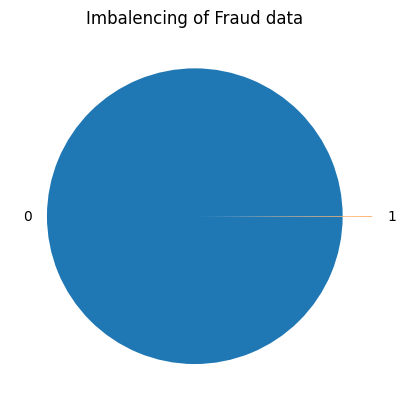

In [65]:
_,_=plt.pie(df['isFraud'].value_counts(),labels=['secure','Fraud'],explode=[0,0.2])
plt.title("Imbalencing of Fraud data")

In [66]:
v=df['type'].unique()
list(v)

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

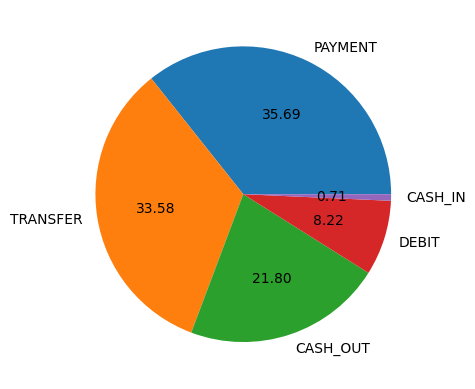

In [67]:
_,_,_=plt.pie(df['type'].value_counts(),labels=v.tolist(),autopct="%0.2f")

In [68]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
695946,36,PAYMENT,37503.58,C1599905877,121.0,0.00,M1959719075,0.0,0.0,0.0,0.0
695947,36,PAYMENT,3913.54,C2040964445,31515.0,27601.46,M1343382567,0.0,0.0,0.0,0.0
695948,36,PAYMENT,29752.87,C1786128504,20006.0,0.00,M1774098045,0.0,0.0,0.0,0.0
695949,36,PAYMENT,11760.34,C637426266,10750.0,0.00,M1720590750,0.0,0.0,0.0,0.0


In [69]:
import re

pattern="^[A-Z]"
l=[]
for i in df['nameOrig']:
    match=re.search(pattern,i)
    if match.group() not in l:
        l.append(match.group())
l

['C']

In [70]:
def outlier_viz(col):
    import random
    color = random.choice(['r', 'g', 'b'])
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

In [71]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [72]:
df[df['isFlaggedFraud']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
695945,36,CASH_OUT,295898.98,C12921613,301513.0,5614.02,C276629076,0.0,295898.98,0.0,0.0
695946,36,PAYMENT,37503.58,C1599905877,121.0,0.00,M1959719075,0.0,0.00,0.0,0.0
695947,36,PAYMENT,3913.54,C2040964445,31515.0,27601.46,M1343382567,0.0,0.00,0.0,0.0
695948,36,PAYMENT,29752.87,C1786128504,20006.0,0.00,M1774098045,0.0,0.00,0.0,0.0


In [73]:
df[df['isFlaggedFraud']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
695945,36,CASH_OUT,295898.98,C12921613,301513.0,5614.02,C276629076,0.0,295898.98,0.0,0.0
695946,36,PAYMENT,37503.58,C1599905877,121.0,0.00,M1959719075,0.0,0.00,0.0,0.0
695947,36,PAYMENT,3913.54,C2040964445,31515.0,27601.46,M1343382567,0.0,0.00,0.0,0.0
695948,36,PAYMENT,29752.87,C1786128504,20006.0,0.00,M1774098045,0.0,0.00,0.0,0.0


In [74]:
df['isFlaggedFraud'].value_counts()

0.0    695950
Name: isFlaggedFraud, dtype: int64

In [75]:
df['isFlaggedFraud'].dtype

dtype('float64')

In [77]:
str_columns = [i for i in df.drop('isFraud', axis=1).columns if df[i].dtypes == 'O']
str_columns

['type', 'nameOrig', 'nameDest']

In [78]:
int_columns = [i for i in df.drop('isFraud', axis=1).columns if df[i].dtypes != 'O']
int_columns

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFlaggedFraud']

In [79]:
l=[]
for i in df['step']:
    l.append(i%24)
type(l)

list

In [80]:
l=pd.DataFrame(l,columns=['hour_steps'])
l

,hour_steps
0,1
1,1
2,1
3,1
4,1
...,...
695946,12
695947,12
695948,12
695949,12


In [81]:
l=l['hour_steps']
l

0          1
1          1
2          1
3          1
4          1
          ..
695946    12
695947    12
695948    12
695949    12
695950    12
Name: hour_steps, Length: 695951, dtype: int64

In [82]:
l.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0])

In [83]:
l.value_counts()


12    72053
10    66895
11    66398
9     61244
19    51352
18    49579
15    44609
17    43361
16    42471
14    41485
20    40625
13    37515
8     21109
21    19152
22    12635
7      6849
23     6144
1      4306
0      3216
6      1668
2      1454
5       669
3       593
4       569
Name: hour_steps, dtype: int64

In [84]:
l.value_counts().shape


(24,)

In [85]:
import warnings
warnings.filterwarnings('ignore')

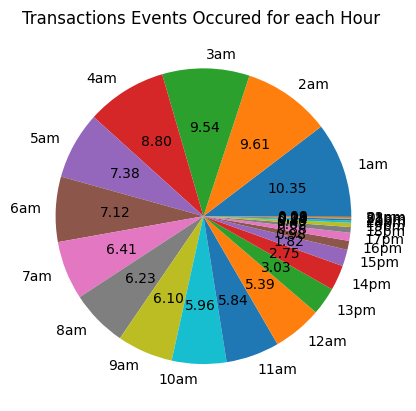

In [86]:
_,_,_=plt.pie(l.value_counts(),labels=[ '1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12am','13pm','14pm','15pm','16pm','17pm',
       '18pm','19pm','20pm','21pm','22pm','23pm','0am'],autopct="%0.2f",labeldistance=1.1)
t=plt.title("Transactions Events Occured for each Hour ")

In [87]:
df['type'].dtype

dtype('O')

<Axes: xlabel='step', ylabel='Density'>

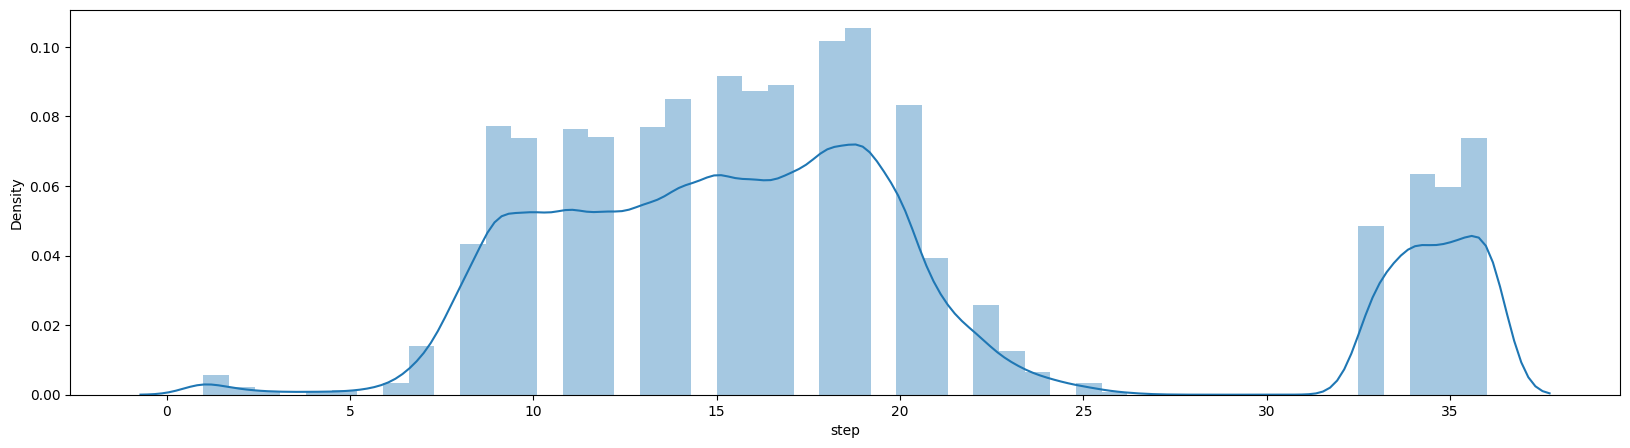

In [88]:

plt.figure(figsize=(20,5))
sns.distplot(df['step'])


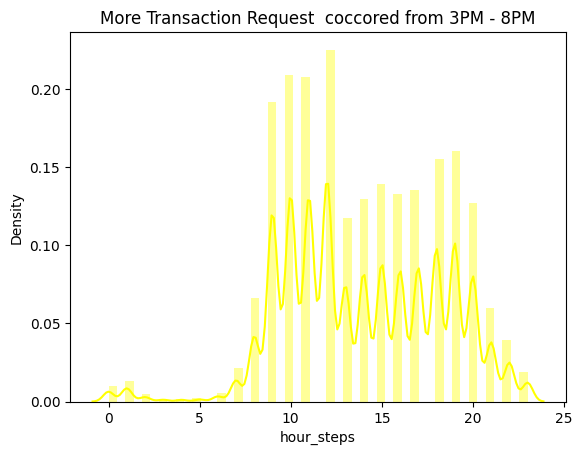

In [89]:
sns.distplot(l,color='yellow')
t=plt.title("More Transaction Request  coccored from 3PM - 8PM")

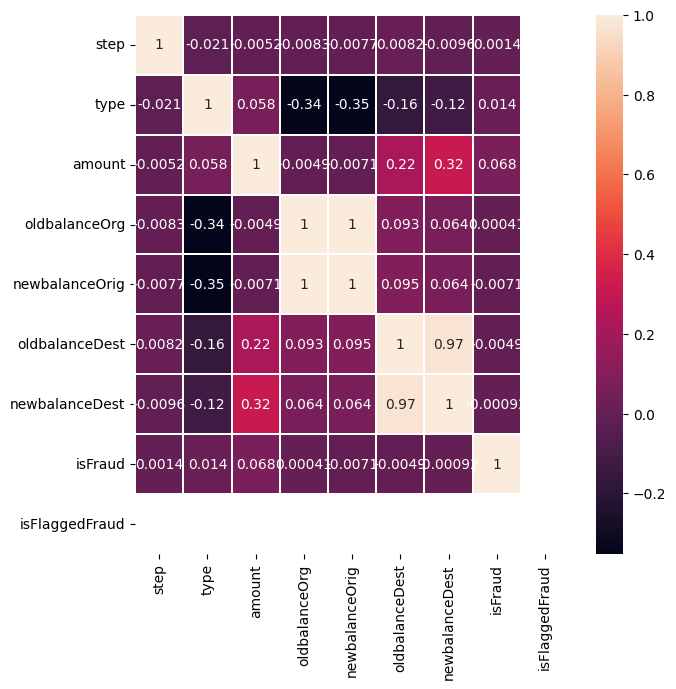

In [115]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), linewidth=0.2, annot=True);

In [114]:
df[df['isFraud']==1]['amount']

2             181.00
3             181.00
251          2806.00
252          2806.00
680         20128.00
             ...    
687726     103056.00
687727     103056.00
694551     234377.29
695414    1684039.12
695415    1684039.12
Name: amount, Length: 417, dtype: float64

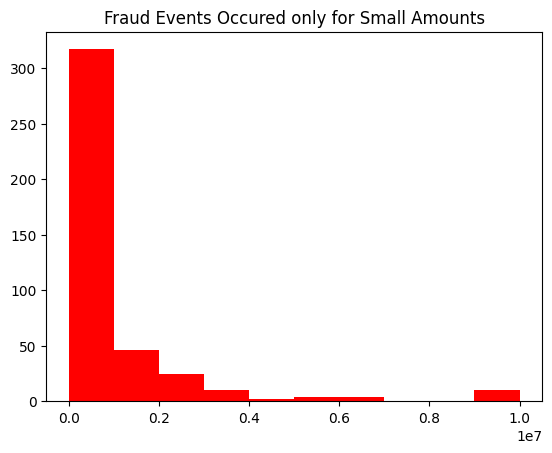

In [91]:
plt.hist(df[df['isFraud']==1]['amount'], bins=10, color='red')
t=plt.title("Fraud Events Occured only for Small Amounts")

In [92]:
df[df['amount']>200000]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.00,51513.44,0.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.00,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.00,C932583850,6267.00,2719172.89,0.0,0.0
82,1,TRANSFER,224606.64,C873175411,0.0,0.00,C766572210,354678.92,0.00,0.0,0.0
84,1,TRANSFER,379856.23,C1449772539,0.0,0.00,C1590550415,900180.00,19169204.93,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
695941,36,CASH_OUT,519024.73,C1771829233,154845.0,0.00,C1624284496,550686.53,1069711.25,0.0,0.0
695942,36,CASH_OUT,236489.15,C174761357,20751.0,0.00,C88226327,2612839.75,2849328.90,0.0,0.0
695944,36,CASH_OUT,234817.35,C911697481,291.0,0.00,C239550442,34253.81,269071.16,0.0,0.0
695945,36,CASH_OUT,295898.98,C12921613,301513.0,5614.02,C276629076,0.00,295898.98,0.0,0.0


Question 3)Domain knowledge: Use my knowledge of fraud to identify variables that are likely to be important for fraud detection. For example, I would include variables such as transaction amount, transaction type, merchant category code, and country code.
Univariate analysis: Perform univariate analysis to identify variables that are strongly correlated with the target variable (fraud or not fraud). For example, I would use chi-squared tests to identify categorical variables that are correlated with the target variable, and I would use correlation tests to identify numerical variables that are correlated with the target variable.
Feature engineering: Create new variables from existing variables that may be more informative for fraud detection. For example, I could create a variable that represents the average transaction amount for a customer over the past 30 days.
Feature selection algorithms: Use feature selection algorithms to identify the most important variables for fraud detection. For example, I could use recursive feature elimination (RFE) to select the most important variables based on their performance in a machine learning model.

In [95]:
df['nameOrig'].value_counts().max()

2

In [96]:
df=df.drop(['nameOrig','nameDest'],axis=1)

# Model Building
Question2)Split your data into training and testing sets.Define your target variable. This is the variable that you want to predict, which is typically fraud or not fraud.Select your features. These are the variables that you will use to train your model.
Train your model. This involves feeding your training data to the model and allowing it to learn the patterns that are characteristic of fraudulent transactions.Evaluate your model. Use your testing data to evaluate the performance of your model. This will give you an idea of how well your model will generalize to new data.

In [98]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from tqdm.notebook import tqdm

import optuna
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

In [99]:
df.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

Question 5)Customer information like Name, address, email address, phone number, IP address, date of birth, etc. Fraudsters often use stolen identities or create fake identities to commit fraud.
Account information like Account number, account type, account balance, etc. Fraudsters may attempt to open fraudulent accounts or take over existing accounts.
Transaction information like Transaction amount, transaction type, merchant category code, country code, time of day, etc. Fraudsters may attempt to make unauthorized transactions or use stolen credit card numbers.
Device information such as Device type, device operating system, device location, etc. Fraudsters may attempt to access accounts from unusual devices or locations.
Behavioral information,Login frequency, transaction frequency, etc. Fraudsters may exhibit unusual behavior, such as logging in at unusual times or making a large number of transactions in a short period of time.

Yes, the key factors that I listed above make sense for predicting fraudulent customer activity. Here is why:
Customer information: Fraudsters often use stolen identities or create fake identities to commit fraud. This is because it allows them to avoid detection and to open new accounts or make fraudulent transactions without being caught.
Account information: Fraudsters may attempt to open fraudulent accounts or take over existing accounts in order to steal money or to obtain goods and services on credit.
Transaction information: Fraudsters may attempt to make unauthorized transactions or use stolen credit card numbers in order to steal money or to purchase goods and services.
Device information: Fraudsters may attempt to access accounts from unusual devices or locations in order to evade detection. For example, a fraudster might use a VPN to hide their IP address or they might use a stolen device to access an account.
Behavioral information: Fraudsters may exhibit unusual behavior, such as logging in at unusual times or making a large number of transactions in a short period of time. This behavior can be indicative of fraudulent activity.

In [100]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
695945,36,CASH_OUT,295898.98,301513.0,5614.02,0.0,295898.98,0.0,0.0
695946,36,PAYMENT,37503.58,121.0,0.00,0.0,0.00,0.0,0.0
695947,36,PAYMENT,3913.54,31515.0,27601.46,0.0,0.00,0.0,0.0
695948,36,PAYMENT,29752.87,20006.0,0.00,0.0,0.00,0.0,0.0


In [103]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])

In [104]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [105]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [106]:
N_SPLITS = 2  # previous:300, increasing N_SPLITS to remove error due to randomness

lgbm_preds = []
xgb_preds = []
catb_preds = []

prob = []

folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)

for fold, (train_id, test_id) in enumerate(tqdm(folds.split(X, y), total=N_SPLITS)):

    print(f'fold {fold + 1}')

    X_train, y_train = X.iloc[train_id], y.iloc[train_id]
    X_valid, y_valid = X.iloc[test_id], y.iloc[test_id]

    lgbm_model = lgbm.LGBMClassifier()
    xgb_model  = xgb.XGBClassifier()
    catb_model = catb.CatBoostClassifier(verbose=0)

    lgbm_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    catb_model.fit(X_train, y_train)
    print("----------------------------------------------------------------------------------------------")
    print(f'Training Accuracy   :- {(lgbm_model.score(X_train, y_train)*100).round(2)}% | {(xgb_model.score(X_train, y_train)*100).round(2)}% | {(catb_model.score(X_train, y_train)*100).round(2)}%')
    print(f'Validation Accuracy :- {(lgbm_model.score(X_valid, y_valid)*100).round(2)}% | {(xgb_model.score(X_valid, y_valid)*100).round(2)}% | {(catb_model.score(X_valid, y_valid)*100).round(2)}%')
    print("----------------------------------------------------------------------------------------------")

    prob1, prob2, prob3 = lgbm_model.predict_proba(X_test), xgb_model.predict_proba(X_test), catb_model.predict_proba(X_test)
    prob.append((prob1 + prob2 + prob3) / 3)
print('Model Trained !!!')

  0%|          | 0/2 [00:00<?, ?it/s]

fold 1
[LightGBM] [Info] Number of positive: 166, number of negative: 278214
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1315
[LightGBM] [Info] Number of data points in the train set: 278380, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000596 -> initscore=-7.424158
[LightGBM] [Info] Start training from score -7.424158
Training Accuracy   :- 99.84% | 100.0% | 100.0%
Validation Accuracy :- 99.83% | 99.98% | 99.98%
fold 2
[LightGBM] [Info] Number of positive: 165, number of negative: 278215
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1316
[LightGBM] [Info] Number of data points in the train set: 278380, number of used features: 7
[LightGBM] [Info] [binary:BoostF

In [107]:

y_pred = pd.Series([np.argmax([i]) for i in final])

Question 4)
The accuracy score is a measure of how well your model is performing overall. It is calculated by taking the number of correct predictions and dividing it by the total number of predictions.

For example, suppose your model predicts 100 transactions, and 90 of those predictions are correct. The accuracy score for your model would be 90%.

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Test Accuracy:- {accuracy_score(y_test, y_pred)*100}%')

Test Accuracy:- 99.97054386090954%


Question 7)Increase security monitoring. During an infrastructure update, there is an increased risk of security vulnerabilities. Companies should increase security monitoring during this time to detect any suspicious activity as soon as possible.
Implement fraud detection measures. Companies should implement fraud detection measures to identify and prevent fraudulent transactions. These measures can include things like fraud rules, machine learning models, and human review.
Communicate with customers. Companies should communicate with customers about the upcoming infrastructure update and the steps they are taking to prevent fraud. This will help to raise customer awareness and make it less likely that customers will fall victim to fraud.

question 8)Number of fraudulent transactions: The number of fraudulent transactions should decrease over time as your fraud prevention measures become more effective.
Percentage of fraudulent transactions: The percentage of fraudulent transactions should also decrease over time.
Type of fraudulent transactions: You should also monitor the type of fraudulent transactions that are occurring. This will help you to identify any new fraud trends that you need to address.
Cost of fraud: The cost of fraud should also decrease over time as your fraud prevention measures become more effective.